In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [62]:
veri = pd.read_csv("vehicles.csv")

In [63]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
id,423857.0,7.190602e+09,5.159269e+06,7.178302e+09,7.186688e+09,7.192068e+09,7.194909e+09,7.197006e+09
price,423857.0,5.779437e+04,1.002581e+07,0.000000e+00,4.499000e+03,9.995000e+03,1.899500e+04,3.808256e+09
year,328743.0,2.009827e+03,1.013581e+01,1.900000e+03,2.007000e+03,2.012000e+03,2.016000e+03,2.021000e+03
odometer,270585.0,9.942578e+04,1.204833e+05,0.000000e+00,4.432400e+04,9.174900e+04,1.372370e+05,1.000000e+07
county,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,324404.0,3.873143e+01,5.902977e+00,-8.038640e+01,3.505450e+01,3.936690e+01,4.251707e+01,8.038340e+01
long,324404.0,-9.394937e+01,1.793057e+01,-1.613940e+02,-1.066780e+02,-8.800990e+01,-8.083250e+01,1.155240e+02


In [64]:
veri.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [65]:
veri = veri.drop(["region_url","url","image_url"],axis =1)


In [66]:
veri.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,vin,drive,size,type,paint_color,description,county,state,lat,long
0,7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,...,1GTEK19T3YE366021,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,...,NaN,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,...,NaN,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,...,NaN,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,...,1GTHK23D57F102022,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [67]:
veri.drop(["county","state"],axis =1)
veri.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,vin,drive,size,type,paint_color,description,county,state,lat,long
0,7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,...,1GTEK19T3YE366021,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,...,NaN,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,...,NaN,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,...,NaN,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,...,1GTHK23D57F102022,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [68]:
veri = pd.DataFrame(veri)


In [69]:
yeni = veri.groupby(["condition","manufacturer"])

In [70]:
yeni.count()

id  region  price  year  model  cylinders  fuel  \
condition manufacturer                                                      
excellent acura          793     793    793   793    793        612   793   
          alfa-romeo      11      11     11    11     11         10    11   
          aston-martin    11      11     11    11     11          3    11   
          audi           946     946    946   946    941        730   946   
          bmw           2534    2534   2534  2534   2511       1878  2534   
...                      ...     ...    ...   ...    ...        ...   ...   
salvage   subaru          17      17     17    17     16         12    17   
          tesla            1       1      1     1      1          1     1   
          toyota          30      30     30    30     28         27    30   
          volkswagen      12      12     12    12     12          6    12   
          volvo            8       8      8     8      8          6     8   

                        odometer  title_status  transmission   vin  drive  \
condition manufacturer                                                      
excellent acura              694           793           793   416    642   
          alfa-romeo           7            11            11     4      8   
          aston-martin        11            11            11     9     10   
          audi               842           946           946   510    770   
          bmw               2270          2534          2530  1394   2010   
...                          ...           ...           ...   ...    ...   
salvage   subaru              15            17            17     3     13   
          tesla                1             1             1     1      1   
          toyota              23            30            30     8     26   
          volkswagen           9            12            12     0      7   
          volvo                4             8             8     2      7   

                        size  type  paint_color  description  county  state  \
condition manufacturer                                                        
excellent acura          357   673          627          793       0    793   
          alfa-romeo       4     8           10           11       0     11   
          aston-martin     1    10            7           11       0     11   
          audi           422   804          754          946       0    946   
          bmw           1080  2206         1996         2533       0   2534   
...                      ...   ...          ...          ...     ...    ...   
salvage   subaru           9    15           15           17       0     17   
          tesla            1     1            1            1       0      1   
          toyota          22    25           27           30       0     30   
          volkswagen       7     9           11           12       0     12   
          volvo            4     7            7            8       0      8   

                         lat  long  
condition manufacturer              
excellent acura          777   777  
          alfa-romeo      11    11  
          aston-martin    11    11  
          audi           941   941  
          bmw           2520  2520  
...                      ...   ...  
salvage   subaru          17    17  
          tesla            1     1  
          toyota          29    29  
          volkswagen      12    12  
          volvo            8     8  

[224 rows x 20 columns]

In [71]:
yeni.mean()

id         price         year  \
condition manufacturer                                            
excellent acura         7.189671e+09   9386.744010  2009.118537   
          alfa-romeo    7.187343e+09  19495.363636  1997.545455   
          aston-martin  7.187725e+09  70827.727273  2012.545455   
          audi          7.189889e+09  15984.263214  2011.121564   
          bmw           7.189235e+09  14057.485793  2009.931334   
...                              ...           ...          ...   
salvage   subaru        7.191000e+09   3608.235294  2006.882353   
          tesla         7.193036e+09  20000.000000  2019.000000   
          toyota        7.188438e+09   3292.233333  2002.733333   
          volkswagen    7.188564e+09   2224.250000  1997.416667   
          volvo         7.187535e+09   1037.500000  1992.125000   

                             odometer  county        lat        long  
condition manufacturer                                                
excellent acura         125490.595101     NaN  38.437767  -92.337657  
          alfa-romeo     28075.714286     NaN  35.885709  -97.060491  
          aston-martin   20186.363636     NaN  29.284273  -87.141927  
          audi           94125.579572     NaN  38.542850  -92.667300  
          bmw            94760.337445     NaN  37.858458  -95.649808  
...                               ...     ...        ...         ...  
salvage   subaru        147047.866667     NaN  42.466494 -100.029559  
          tesla          60000.000000     NaN  27.938200  -82.375600  
          toyota        113240.913043     NaN  39.156586  -99.751603  
          volkswagen    124166.666667     NaN  38.892233  -96.759142  
          volvo         180244.000000     NaN  43.403913  -92.475975  

[224 rows x 7 columns]

([array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([5., 0., 0., 0., 0., 0.

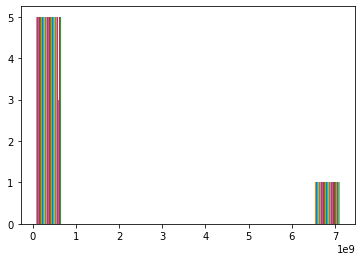

In [72]:
plt.hist(yeni.mean())

[]

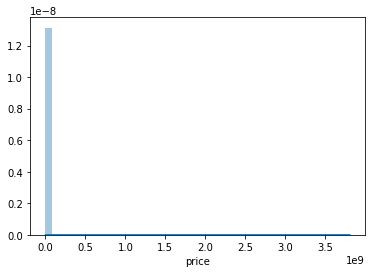

In [78]:
sbn.distplot(veri["price"])
plt.plot(figsize = (8,8),dpi = 300)

In [90]:
sbn.countplot(veri["year"])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [81]:
veri.corr()["price"].sort_values()

year       -0.005746
odometer   -0.000789
lat        -0.000015
long        0.000320
id          0.001032
price       1.000000
county           NaN
Name: price, dtype: float64

In [82]:
veri.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,vin,drive,size,type,paint_color,description,county,state,lat,long
0,7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,...,1GTEK19T3YE366021,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,...,NaN,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,...,NaN,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,...,NaN,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,...,1GTHK23D57F102022,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [83]:
yeni.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,vin,drive,size,type,paint_color,description,county,state,lat,long
0,7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,...,1GTEK19T3YE366021,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,...,NaN,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,...,NaN,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,...,NaN,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,...,1GTHK23D57F102022,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399027,7186841792,modesto,1000,2001.0,acura,tl,salvage,6 cylinders,gas,290114.0,...,NaN,fwd,mid-size,NaN,blue,2001 Acura TL Salvaged. Asking $1000 obo. ...,NaN,ca,37.7421,-121.0300
406151,7179598957,santa barbara,7000,2017.0,mazda,3,salvage,NaN,gas,NaN,...,3MZBN1U74HM122275,fwd,NaN,NaN,black,"I bought this salvage car for $10,000 . Its be...",NaN,ca,34.4043,-119.7050
411008,7188636002,columbus,2800,2004.0,land rover,discovery 2,good,8 cylinders,gas,NaN,...,NaN,NaN,full-size,SUV,silver,im selling my 2004 discovery 2 land rover .it ...,NaN,oh,39.9437,-83.2852
412258,7194509111,fort collins / north CO,900,1984.0,mercury,cougar,salvage,8 cylinders,gas,94000.0,...,NaN,rwd,NaN,NaN,red,This is an 1984 Mercury Cougar basic w/302 V-8...,NaN,co,40.2993,-105.1050


In [84]:
veri = yeni

In [85]:
veri.describe()

id                                            \
                         count          mean           std           min   
condition manufacturer                                                     
excellent acura          793.0  7.189671e+09  4.520957e+06  7.178460e+09   
          alfa-romeo      11.0  7.187343e+09  5.649898e+06  7.179894e+09   
          aston-martin    11.0  7.187725e+09  4.430071e+06  7.181780e+09   
          audi           946.0  7.189889e+09  4.575513e+06  7.178309e+09   
          bmw           2534.0  7.189235e+09  4.771477e+06  7.178307e+09   
...                        ...           ...           ...           ...   
salvage   subaru          17.0  7.191000e+09  3.332604e+06  7.181099e+09   
          tesla            1.0  7.193036e+09           NaN  7.193036e+09   
          toyota          30.0  7.188438e+09  4.508736e+06  7.179545e+09   
          volkswagen      12.0  7.188564e+09  4.909676e+06  7.178532e+09   
          volvo            8.0  7.187535e+09  6.783535e+06  7.179461e+09   

                                                                  \
                                 25%           50%           75%   
condition manufacturer                                             
excellent acura         7.186015e+09  7.190836e+09  7.193759e+09   
          alfa-romeo    7.182780e+09  7.184610e+09  7.193249e+09   
          aston-martin  7.185257e+09  7.185510e+09  7.191117e+09   
          audi          7.186736e+09  7.191027e+09  7.193773e+09   
          bmw           7.185532e+09  7.190245e+09  7.193605e+09   
...                              ...           ...           ...   
salvage   subaru        7.189827e+09  7.191130e+09  7.192844e+09   
          tesla         7.193036e+09  7.193036e+09  7.193036e+09   
          toyota        7.185393e+09  7.188699e+09  7.192221e+09   
          volkswagen    7.186414e+09  7.189014e+09  7.191789e+09   
          volvo         7.181227e+09  7.187342e+09  7.194524e+09   

                                       price                ...        lat  \
                                 max   count          mean  ...        75%   
condition manufacturer                                      ...              
excellent acura         7.195220e+09   793.0   9386.744010  ...  41.995800   
          alfa-romeo    7.194850e+09    11.0  19495.363636  ...  41.467650   
          aston-martin  7.194407e+09    11.0  70827.727273  ...  27.832100   
          audi          7.195192e+09   946.0  15984.263214  ...  42.493500   
          bmw           7.195206e+09  2534.0  14057.485793  ...  41.674500   
...                              ...     ...           ...  ...        ...   
salvage   subaru        7.195083e+09    17.0   3608.235294  ...  46.616500   
          tesla         7.193036e+09     1.0  20000.000000  ...  27.938200   
          toyota        7.194973e+09    30.0   3292.233333  ...  42.009000   
          volkswagen    7.194561e+09    12.0   2224.250000  ...  41.317875   
          volvo         7.195063e+09     8.0   1037.500000  ...  45.224550   

                                   long                                   \
                            max   count        mean        std       min   
condition manufacturer                                                     
excellent acura         61.2886   777.0  -92.337657  18.285502 -157.9800   
          alfa-romeo    45.5137    11.0  -97.060491  26.555610 -154.9930   
          aston-martin  39.3953    11.0  -87.141927  11.577757 -119.8950   
          audi          61.2174   941.0  -92.667300  18.349886 -158.0120   
          bmw           61.2184  2520.0  -95.649808  19.548680 -158.0870   
...                         ...     ...         ...        ...       ...   
salvage   subaru        48.7490    17.0 -100.029559  21.571544 -124.1970   
          tesla         27.9382     1.0  -82.375600        NaN  -82.3756   
          toyota        61.5793    29.0  -99.751603  20.516549 -149.2970   
     

In [92]:
sbn.scatterplot(data=veri,x="mileage",y="price")

AttributeError: 'DataFrameGroupBy' object has no attribute 'get'